In [44]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('us_flight_data.csv')
print(df.head(5))

       tbl  Year  quarter  citymarketid_1  citymarketid_2          city1  \
0  Table1a  2023        4           35412           33195  Knoxville, TN   
1  Table1a  2023        4           35412           33195  Knoxville, TN   
2  Table1a  2023        4           35412           32467  Knoxville, TN   
3  Table1a  2023        4           35412           32467  Knoxville, TN   
4  Table1a  2023        4           35412           31703  Knoxville, TN   

                                   city2  airportid_1  airportid_2 airport_1  \
0          Tampa, FL (Metropolitan Area)        15412        15304       TYS   
1          Tampa, FL (Metropolitan Area)        15412        14112       TYS   
2          Miami, FL (Metropolitan Area)        15412        13303       TYS   
3          Miami, FL (Metropolitan Area)        15412        11697       TYS   
4  New York City, NY (Metropolitan Area)        15412        12953       TYS   

   ...    fare  carrier_lg  large_ms  fare_lg carrier_low   lf

In [13]:
print(df.columns)

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')


tbl - name of data table
year - year
quarter - quarter of year
citymarketid_1 - id of departure city
citymarketid_2 - id of arrival city
city1 - name of departure city
city2 - name of arrival city
airport_1 - departure airport code
airport_2 - arrival airport code
nsmiles - nautical miles (1nms=1.852km)
passengers - average passengers per day per quarter
fare - overall average fare
carrier_lg - carrier with the largest market share
large_ms - % of market share for biggest carrier
fare_lg - average fare for biggest carrier
carrier_low - carrier with the lowest fare
lf_ms - market share for the lowest carrier
fare_low - average fare for the lowest carrier
tbl1apk - primiary key, unique id

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244050 entries, 0 to 244049
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             244050 non-null  object 
 1   Year            244050 non-null  int64  
 2   quarter         244050 non-null  int64  
 3   citymarketid_1  244050 non-null  int64  
 4   citymarketid_2  244050 non-null  int64  
 5   city1           244050 non-null  object 
 6   city2           244050 non-null  object 
 7   airportid_1     244050 non-null  int64  
 8   airportid_2     244050 non-null  int64  
 9   airport_1       244050 non-null  object 
 10  airport_2       244050 non-null  object 
 11  nsmiles         244050 non-null  int64  
 12  passengers      244050 non-null  int64  
 13  fare            244050 non-null  float64
 14  carrier_lg      242516 non-null  object 
 15  large_ms        242516 non-null  float64
 16  fare_lg         242516 non-null  float64
 17  carrier_lo

In [15]:
df.describe()


,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,244050.000000,244050.000000,244050.000000,244050.000000,244050.000000,244050.000000,244050.000000,244050.000000,244050.00000,242516.000000,242516.000000,242444.000000,242444.000000
mean,2008.403323,2.490699,31556.488474,32180.129183,12437.270932,13250.394989,1189.820832,298.768019,218.68091,0.664881,218.403570,0.449987,190.495074
std,8.628773,1.118855,1089.748191,1232.236172,1431.764165,1425.867780,703.306698,510.638367,82.27276,0.224660,84.531503,0.332544,73.486377
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.00000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.36000,0.480000,161.230000,0.157075,139.980000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,112.000000,209.01500,0.651200,207.680000,0.360000,181.420000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,338.000000,262.55000,0.870000,263.290000,0.750000,229.800000
max,2023.000000,4.000000,35412.000000,35412.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.00000,1.000000,2725.600000,1.000000,2725.600000


In [17]:
df.isnull().sum()

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1534
large_ms           1534
fare_lg            1534
carrier_low        1606
lf_ms              1606
fare_low           1606
Geocoded_City1    37301
Geocoded_City2    37301
tbl1apk               0
dtype: int64

In [22]:
df.dropna(inplace=True)
df.isnull().sum()

tbl               0
Year              0
quarter           0
citymarketid_1    0
citymarketid_2    0
city1             0
city2             0
airportid_1       0
airportid_2       0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg        0
large_ms          0
fare_lg           0
carrier_low       0
lf_ms             0
fare_low          0
Geocoded_City1    0
Geocoded_City2    0
tbl1apk           0
dtype: int64

In [29]:
df['Year'].value_counts()

Year
1993    9664
1999    8699
1996    8698
1998    8633
2001    8596
2002    8548
1997    8541
2000    8504
2003    8449
2004    8428
2005    8344
2013    8276
2017    8220
2016    8217
2014    8214
2012    8206
2006    8175
2015    8133
2011    8121
2010    8095
2009    8087
2008    8074
2007    7972
2018    4060
2020    3797
1994    2388
2019    2050
Name: count, dtype: int64

In [30]:
df["carrier_lg"].unique()

array(['AA', 'DL', 'UA', 'G4', 'WN', 'B6', 'AS', 'F9', 'NK', 'SY', 'VX',
       'CO', 'TW', 'US', 'FL', 'TZ', 'NW', 'YX', 'HP', 'RU', 'JI', 'UK',
       'KW', 'NJ', 'U5', 'J7', 'P9', 'FF', 'QQ', 'WV', 'PN', '9K', 'N7',
       'YV', 'YY', '9N', 'U2', 'QX', 'W7', 'ZW', 'BF', 'OO', 'AQ', 'KP',
       'XJ', 'HQ', 'DH', 'RL', 'LC', 'TB', '5J', 'W9', 'SX', 'ZA', 'E9',
       'OE', 'ZV', 'PA', 'RP', '3M', 'OH', 'KN', 'OP', 'KS', 'T3'],
      dtype=object)

In [32]:
df.head(5)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
9822,Table 1a,2017,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,15070,XNA,...,260.00,AA,1.0000,260.00,AA,1.0000,260.00,"Fayetteville, AR\n(36.061928, -94.160583)","New York City, NY (Metropolitan Area)\n(40.123...",201741591915070XNASWF
9823,Table 1a,2017,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,12953,XNA,...,261.75,AA,0.6933,265.03,DL,0.2511,263.92,"Fayetteville, AR\n(36.061928, -94.160583)","New York City, NY (Metropolitan Area)\n(40.123...",201741591912953XNALGA
9824,Table 1a,2017,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,12478,XNA,...,258.00,DL,0.4684,260.86,AA,0.4421,254.75,"Fayetteville, AR\n(36.061928, -94.160583)","New York City, NY (Metropolitan Area)\n(40.123...",201741591912478XNAJFK
9825,Table 1a,2017,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,12197,XNA,...,246.35,DL,0.5000,235.83,DL,0.5000,235.83,"Fayetteville, AR\n(36.061928, -94.160583)","New York City, NY (Metropolitan Area)\n(40.123...",201741591912197XNAHPN
9826,Table 1a,2017,4,31834,31703,"Fayetteville, AR","New York City, NY (Metropolitan Area)",15919,11618,XNA,...,306.79,UA,0.7843,306.35,UA,0.7843,306.35,"Fayetteville, AR\n(36.061928, -94.160583)","New York City, NY (Metropolitan Area)\n(40.123...",201741591911618XNAEWR


In [100]:
#print(df)
#df = df.drop('tbl', axis=1)
#df = df.drop(['Geocoded_City1', 'Geocoded_City2'], axis=1)
print(df)

        Year  quarter  citymarketid_1  citymarketid_2  \
9822    2017        4           31834           31703   
9823    2017        4           31834           31703   
9824    2017        4           31834           31703   
9825    2017        4           31834           31703   
9826    2017        4           31834           31703   
...      ...      ...             ...             ...   
242125  2014        1           31703           35096   
242126  2002        1           30721           32575   
242127  1993        1           31453           32457   
242128  2001        1           30693           31703   
242129  2010        1           34614           33195   

                                        city1  \
9822                         Fayetteville, AR   
9823                         Fayetteville, AR   
9824                         Fayetteville, AR   
9825                         Fayetteville, AR   
9826                         Fayetteville, AR   
...                  

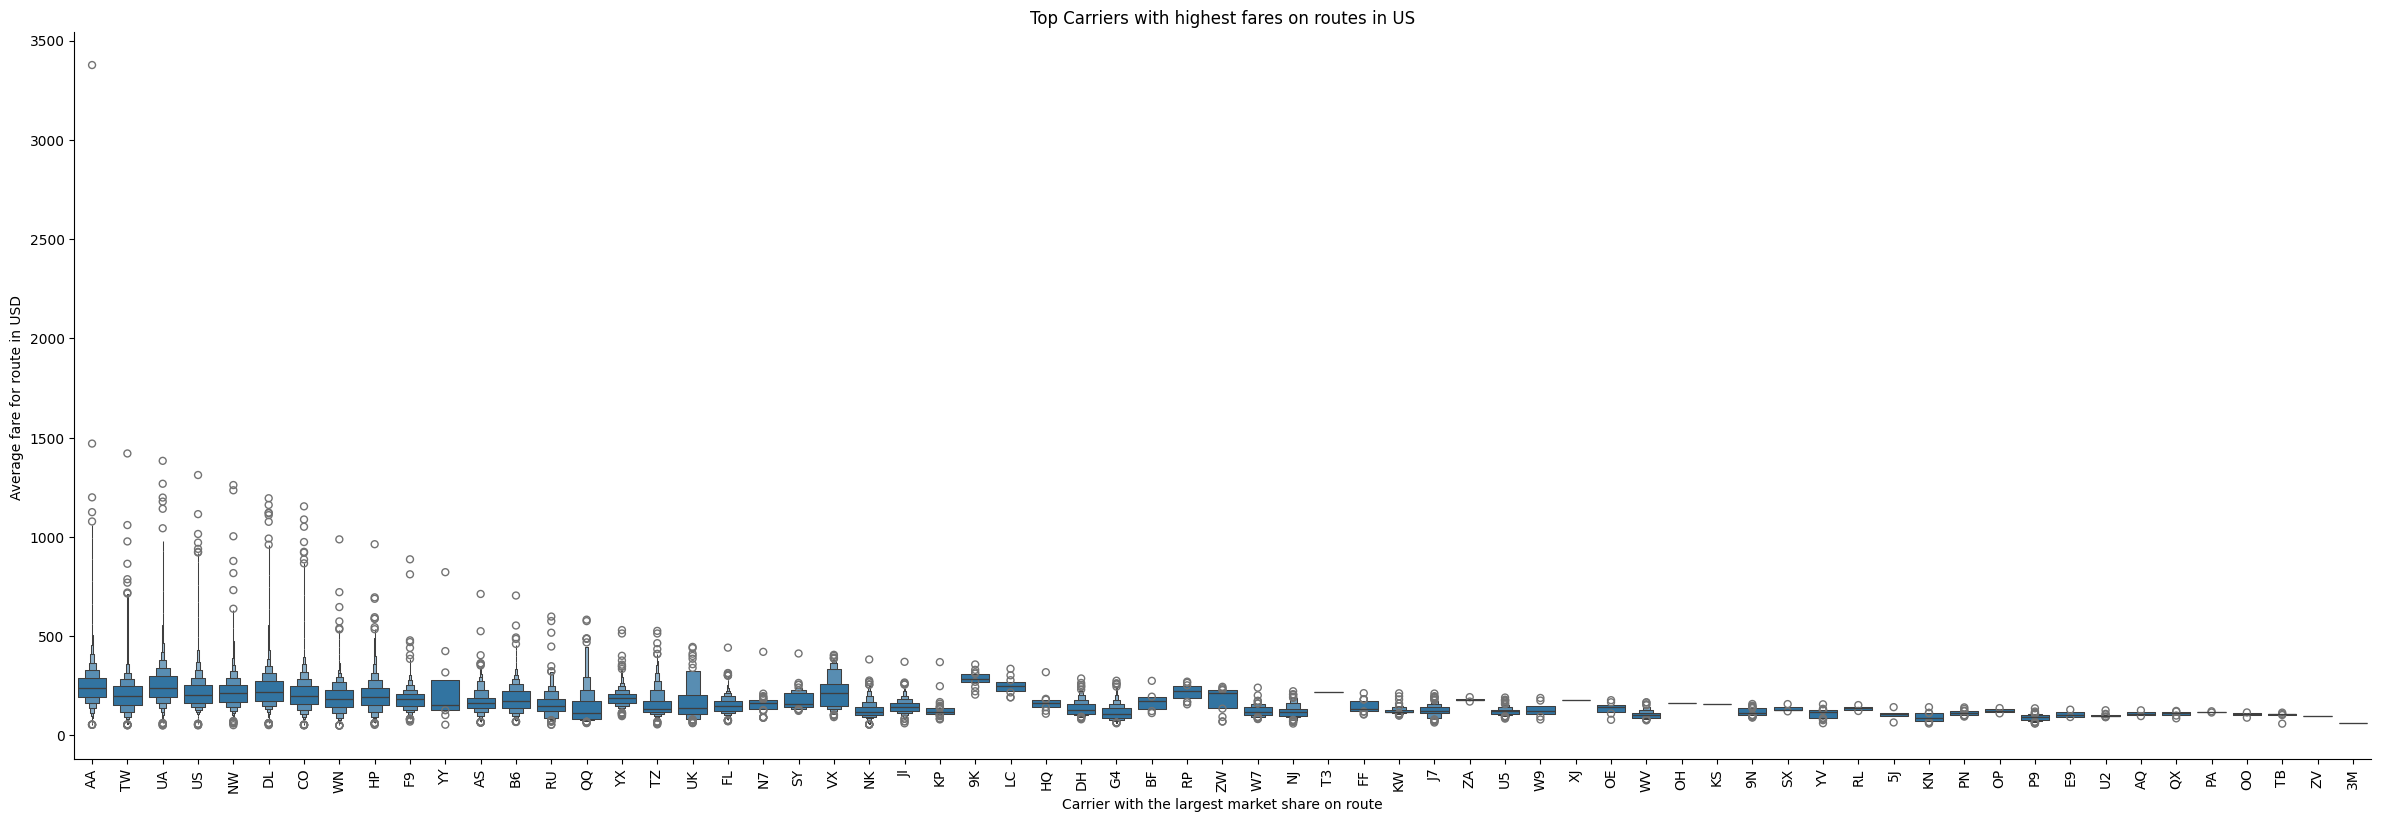

In [63]:
#Plotting price vs airline code plot

sns.catplot(y = "fare", x = "carrier_lg", data = df.sort_values("fare", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.xlabel("Carrier with the largest market share on route")
plt.ylabel("Average fare for route in USD ")
plt.title("Top Carriers with highest fares on routes in US")
plt.xticks(rotation=90)
plt.show()

Brak wartosci odstajacych, zbior zawiera usrednione ceny.

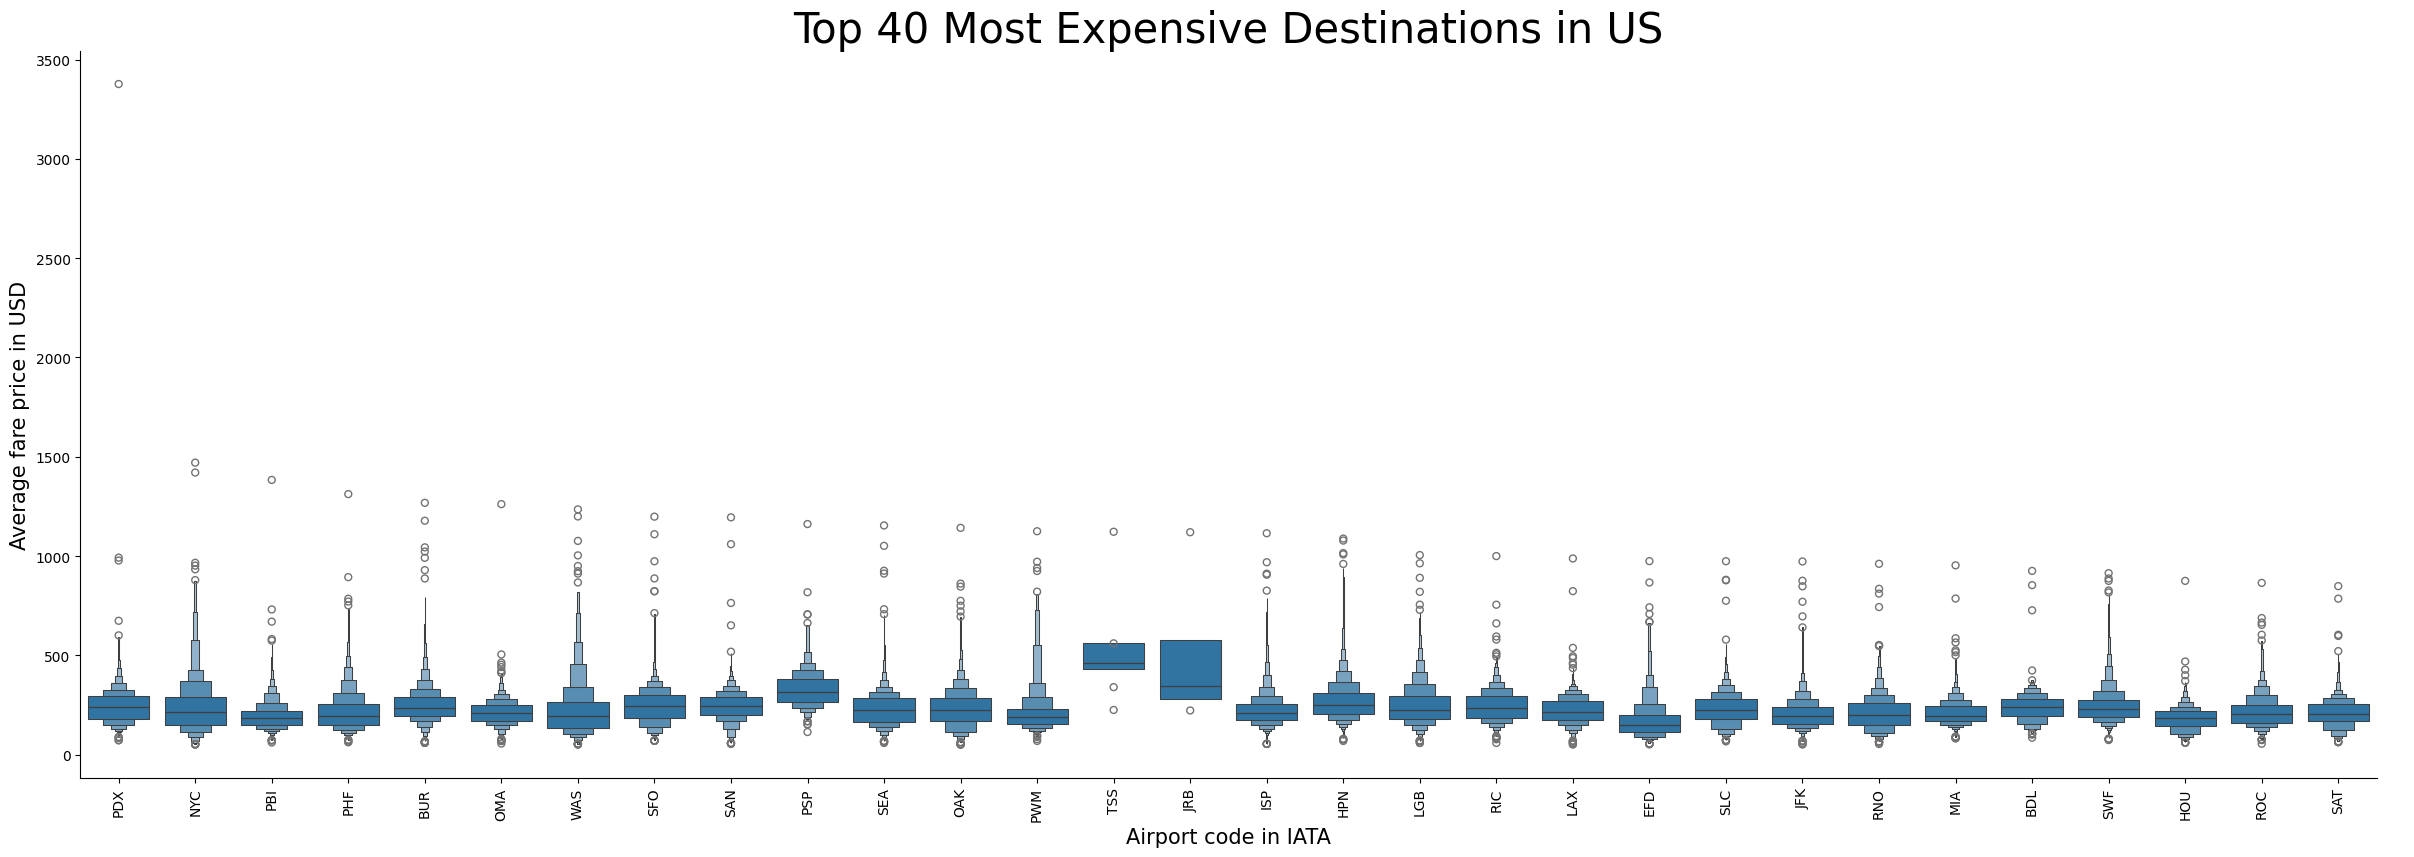

In [68]:
sorted_df = df.sort_values("fare", ascending=False)
top_40_airports = sorted_df['airport_2'].unique()[:30]
top_40_df = sorted_df[sorted_df['airport_2'].isin(top_40_airports)]

sns_plot = sns.catplot(
    y="fare", 
    x="airport_2", 
    data=top_40_df, 
    kind="boxen", 
    height=8, 
    aspect=3
)

plt.xlabel("Airport code in IATA", fontsize=15)
plt.ylabel("Average fare price in USD", fontsize=15)
plt.title("Top 40 Most Expensive Destinations in US", fontsize=30)

plt.xticks(rotation=90)
plt.show()

      Year  quarter  citymarketid_1  citymarketid_2             city1  \
9822  2017        4           31834           31703  Fayetteville, AR   
9823  2017        4           31834           31703  Fayetteville, AR   
9824  2017        4           31834           31703  Fayetteville, AR   
9825  2017        4           31834           31703  Fayetteville, AR   
9826  2017        4           31834           31703  Fayetteville, AR   
9827  2017        4           35412           31703     Knoxville, TN   
9828  2017        4           35412           32467     Knoxville, TN   
9829  2017        4           35412           31703     Knoxville, TN   
9830  2017        4           35412           31703     Knoxville, TN   
9831  2017        4           35412           31703     Knoxville, TN   

                                      city2  airportid_1  airportid_2  \
9822  New York City, NY (Metropolitan Area)        15919        15070   
9823  New York City, NY (Metropolitan Area)       

C:\Users\wiktor.zaremba\AppData\Local\Temp\ipykernel_20028\58044598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passengers', y='route', data=top_xx_routes, palette='viridis')


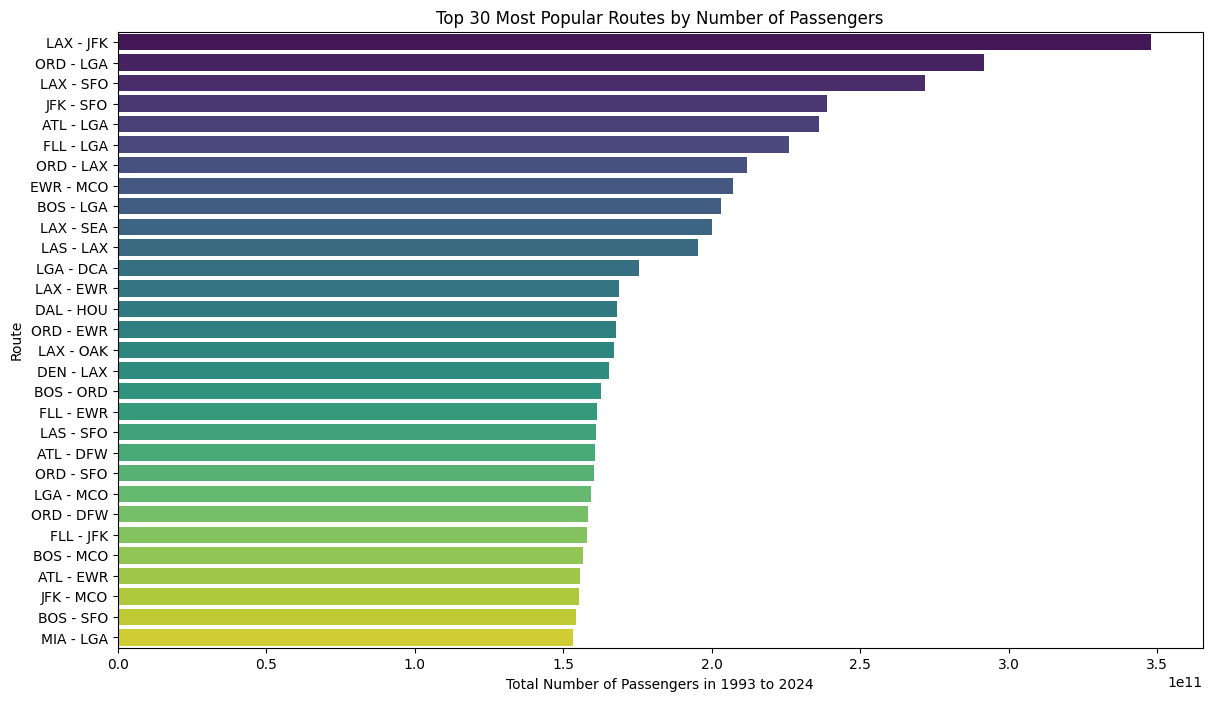

In [111]:
df['route'] = df['airport_1'] + ' - ' + df['airport_2']
df['passengers'] = df['total_passengers'] * 90
print(df.head(10))
passengers_on_route = df.groupby('route')['passengers'].sum().reset_index()
passengers_on_route['passengers'] = passengers_on_route['passengers'] * 91
top_xx_routes = passengers_on_route.sort_values(by='passengers', ascending=False).head(30)
plt.figure(figsize=(14, 8))
sns.barplot(x='passengers', y='route', data=top_xx_routes, palette='viridis')
plt.xlabel("Total Number of Passengers in 1993 to 2024")
plt.ylabel("Route")
plt.title("Top 30 Most Popular Routes by Number of Passengers")
plt.show()

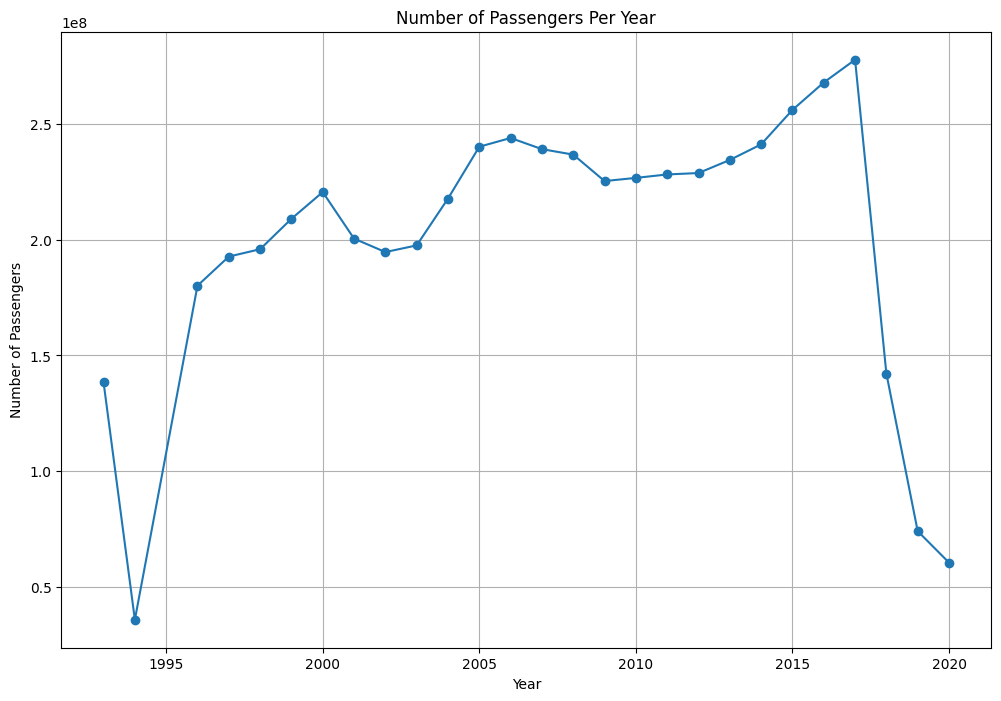

In [126]:
# grupowanie
passengers_per_year = df.groupby('Year')['total_passengers'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(passengers_per_year['Year'], passengers_per_year['total_passengers'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Per Year')
plt.grid(True)
plt.show()

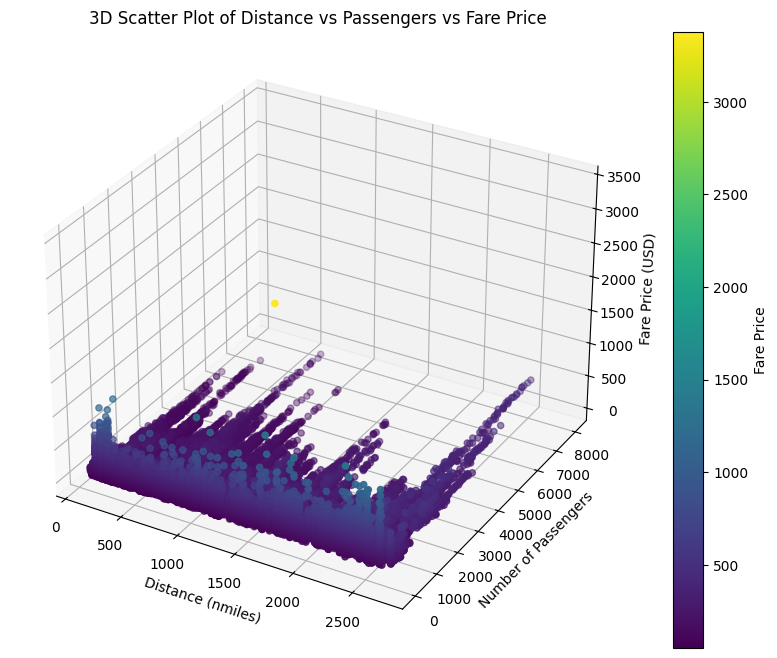

In [78]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(df['nsmiles'], df['passengers'], df['fare'], c=df['fare'], cmap='viridis', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label('Fare Price')


ax.set_xlabel('Distance (nmiles)')
ax.set_ylabel('Number of Passengers')
ax.set_zlabel('Fare Price (USD)')
ax.set_title('3D Scatter Plot of Distance vs Passengers vs Fare Price')

plt.show()

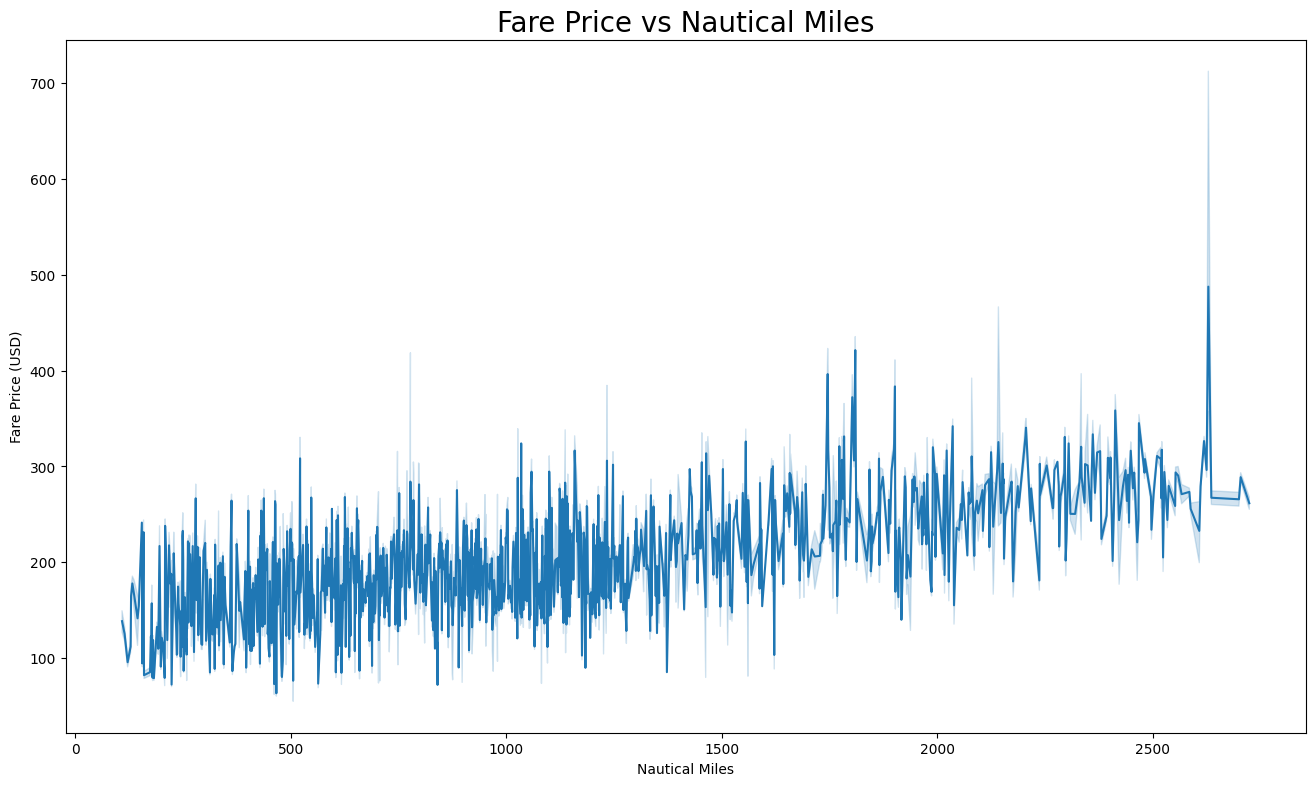

In [150]:
# Sort the DataFrame by 'nsmiles' to ensure a smooth line plot
df = df.sort_values(by='nsmiles')

plt.figure(figsize=(16, 9))
sns.lineplot(x='nsmiles', y='fare', data=df)


plt.xlabel("Nautical Miles", fontsize=10)
plt.ylabel("Fare Price (USD)", fontsize=10)
plt.title("Fare Price vs Nautical Miles", fontsize=20)
plt.show()

In [110]:
print(df['passengers'].head(10))
print(df['total_passengers'].head(10))
sorted_df = df.sort_values(by='total_passengers', ascending=False)
print(sorted_df['total_passengers'])

9822      0
9823    221
9824     21
9825      5
9826    112
9827      1
9828     43
9829    155
9830     16
9831      2
Name: passengers, dtype: int64
9822        0
9823    19890
9824     1890
9825      450
9826    10080
9827       90
9828     3870
9829    13950
9830     1440
9831      180
Name: total_passengers, dtype: int64
131839    722070
66994     707130
10713     689490
137919    679950
133903    679770
           ...  
164900         0
49614          0
164909         0
164920         0
9822           0
Name: total_passengers, Length: 205189, dtype: int64


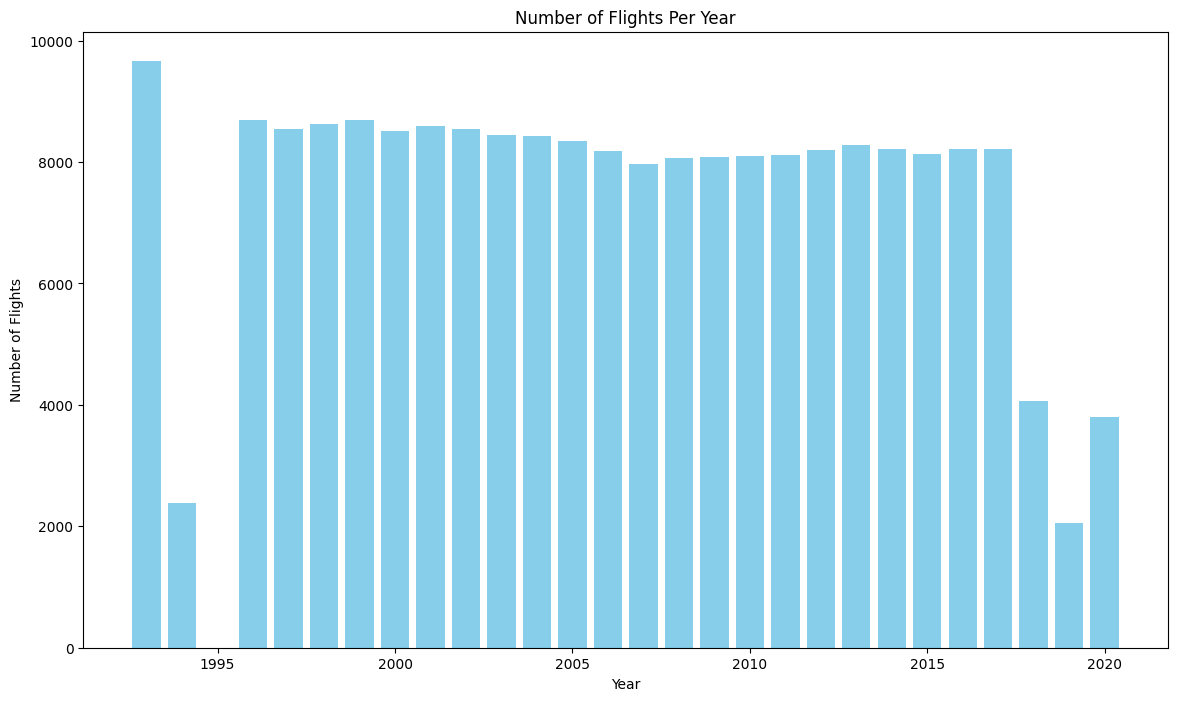

In [115]:
flights_per_year = df.groupby('Year').size().reset_index(name='Number of Flights')
flights_per_year = flights_per_year.sort_values(by='Year', ascending=False)
plt.figure(figsize=(14, 8))
plt.bar(flights_per_year['Year'], flights_per_year['Number of Flights'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Number of Flights Per Year')
plt.show()

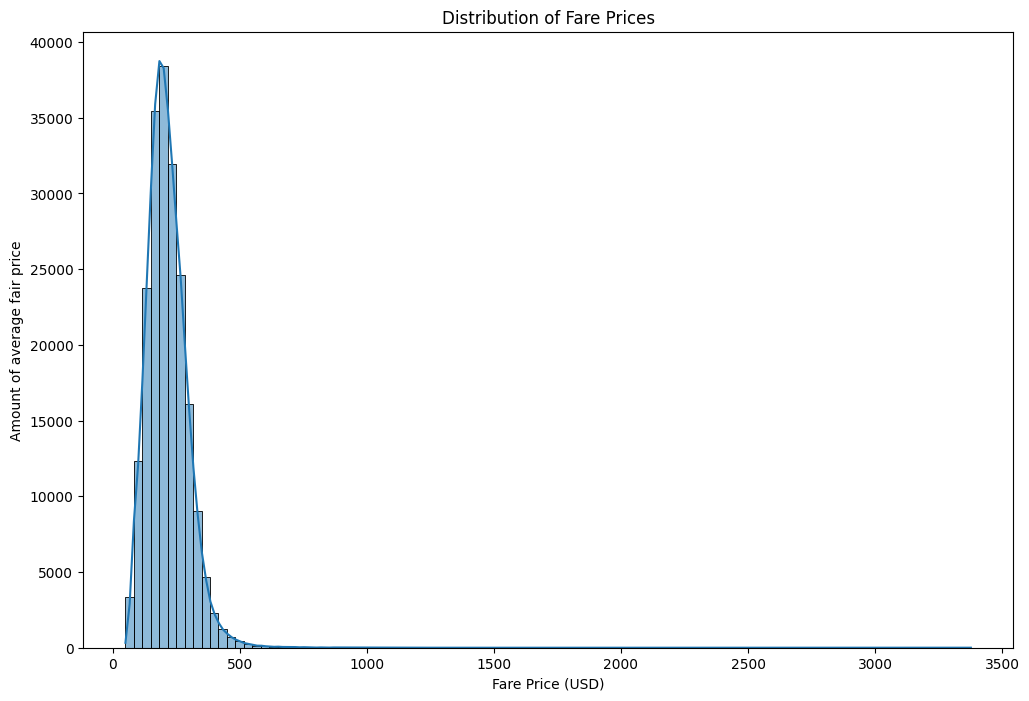

In [121]:
# Create a histogram of fare prices
plt.figure(figsize=(12, 8))
sns.histplot(df['fare'], bins=100, kde=True)
plt.xlabel('Fare Price (USD)')
plt.ylabel('Amount of average fair price')
plt.title('Distribution of Fare Prices')
plt.show()

C:\Users\wiktor.zaremba\AppData\Local\Temp\ipykernel_20028\3780752153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quarter', y='fare', data=df, palette='viridis')


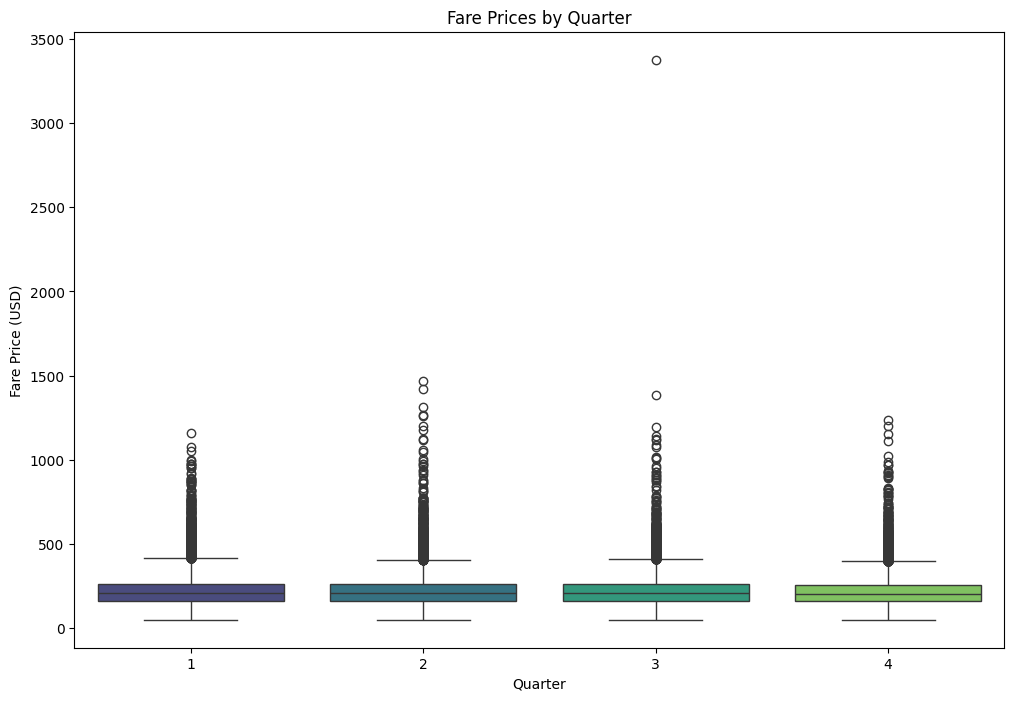

In [130]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='quarter', y='fare', data=df, palette='viridis')
plt.xlabel('Quarter')
plt.ylabel('Fare Price (USD)')
plt.title('Fare Prices by Quarter')
plt.show()

to byla analiza eksploracyjna, teraz przejdziemy do wykorzystania uczenia maszynowego

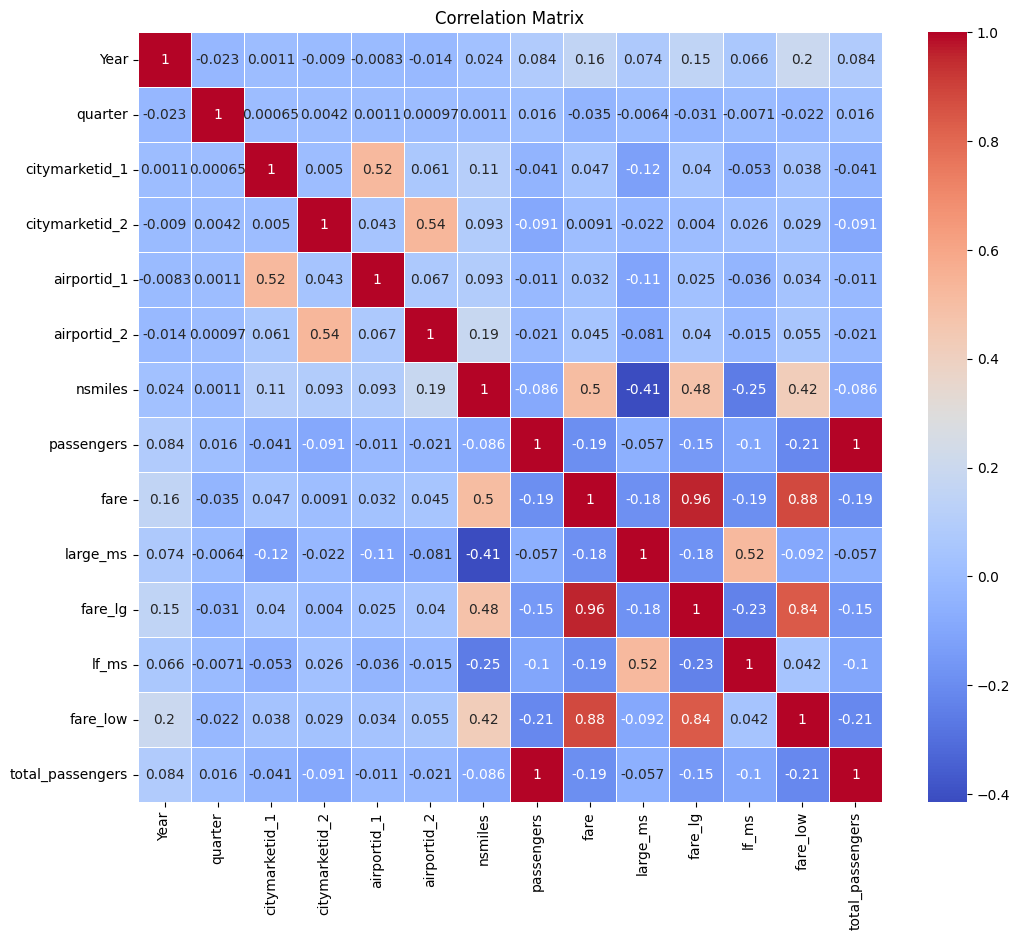

In [142]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [143]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205189 entries, 9822 to 242129
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Year              205189 non-null  int64   
 1   quarter           205189 non-null  int64   
 2   citymarketid_1    205189 non-null  int64   
 3   citymarketid_2    205189 non-null  int64   
 4   city1             205189 non-null  object  
 5   city2             205189 non-null  object  
 6   airportid_1       205189 non-null  int64   
 7   airportid_2       205189 non-null  int64   
 8   airport_1         205189 non-null  object  
 9   airport_2         205189 non-null  object  
 10  nsmiles           205189 non-null  int64   
 11  passengers        205189 non-null  int64   
 12  fare              205189 non-null  float64 
 13  carrier_lg        205189 non-null  object  
 14  large_ms          205189 non-null  float64 
 15  fare_lg           205189 non-null  float64 
 16  carr

Transformacja danych


In [151]:
df_bk=df.copy()

In [152]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [153]:
x=df.drop(['fare'],axis=1)
y=df['fare']

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((143632, 22), (61557, 22), (143632,), (61557,))

In [158]:
from sklearn.preprocessing import MinMaxScaler
# Select only numeric columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data
X_train[numeric_columns] = mmscaler.fit_transform(X_train[numeric_columns])

# Transform the test data
X_test[numeric_columns] = mmscaler.transform(X_test[numeric_columns])

# Convert back to DataFrame if necessary
X_train = pd.DataFrame(X_train, columns=numeric_columns)
X_test = pd.DataFrame(X_test, columns=numeric_columns)

In [164]:
print("The size of training input is", X_train.shape)
print("The size of training output is", Y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", Y_test.shape)

models = {'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] 
             ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] 
             ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}

results = pd.DataFrame(models)
print(models)
results.head()

The size of training input is (143632, 13)
The size of training output is (143632,)
The size of testing input is (61557, 13)
The size of testing output is (61557,)
{'Model Name': [], 'Mean_Absolute_Error_MAE': [], 'Adj_R_Square': [], 'Root_Mean_Squared_Error_RMSE': [], 'Mean_Absolute_Percentage_Error_MAPE': [], 'Mean_Squared_Error_MSE': [], 'Root_Mean_Squared_Log_Error_RMSLE': [], 'R2_score': []}


,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Building models

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    models.fit(X_train, Y_train)
    y_pred = models.predict(X_test)
    print('Model Name: ', models)

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(Y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(Y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(Y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(Y_test, y_pred))),3))
    
    def MAPE (Y_test, y_pred):
        Y_test, y_pred = np.array(Y_test), np.array(y_pred)
        return np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
    
    result = MAPE(Y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    r_squared = round(metrics.r2_score(Y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(Y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(Y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(Y_test, y_pred))),
               'R2_score' : metrics.r2_score(Y_test, y_pred)}
    results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 10.542
Mean Squared Error (MSE): 389.562
Root Mean Squared Error (RMSE): 19.737
R2_score: 0.939341
Root Mean Squared Log Error (RMSLE): 2.983
Mean Absolute Percentage Error (MAPE): 4.82 %
Adj R Square:  0.939334
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 10.32
Mean Squared Error (MSE): 607.16
Root Mean Squared Error (RMSE): 24.641
R2_score: 0.905459
Root Mean Squared Log Error (RMSLE): 3.204
Mean Absolute Percentage Error (MAPE): 4.49 %
Adj R Square:  0.905449
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 7.17
Mean Squared Error (MSE): 333.706
Root Mean Squared Error (RMSE): 18.268
R2_score: 0.948038
Root Mean Squared Log Error (RMSLE): 2.905
Mean Absolute Percentage Error (MAPE): 3.11 %
Adj R Square:  0.948032
------------------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 30.069
Mean Squared Error (MSE): 2059.586
Root Mean Squared Error (RMSE): 45.383
R2_score: 0.6793
Root Mean Squared Log Error (RMSLE): 3.815
Mean Absolute Percentage Error (MAPE): 14.62 %
Adj R Square:  0.679266
------------------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 7.047
Mean Squared Error (MSE): 339.841
Root Mean Squared Error (RMSE): 18.435
R2_score: 0.947083
Root Mean Squared Log Error (RMSLE): 2.914
Mean Absolute Percentage Error (MAPE): 3.04 %
Adj R Square:  0.947077
------------------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingRegressor(loss='huber')
Mean Absolute Error (MAE): 8.42
Mean Squared Error (MSE): 437.368
Root Mean Squared Error (RMSE): 20.913
R2_score: 0.931897
Root Mean Squared Log Error (RMSLE): 3.04
Mean Absolute Percentage Error (MAPE): 3.65 %
Adj R Square:  0.93189
------------------------------------------------------------------------------------------------------------
Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error (MAE): 7.617
Mean Squared Error (MSE): 423.446
Root Mean Squared Error (RMSE): 20.578
R2_score: 0.934065
Root Mean Squared Log Error (RMSLE): 3.024
Mean Absolute Percentage Error (MAPE): 3.32 %
Adj R Square:  0.934058
------------------------------------------------------------------------------------------------------------
Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 7.699
Mean Squared Error (MSE): 361.911
Root Mean Squared Error (RMSE): 19.024
R2_score: 0.943647
Root Mean Squared Log Error (RMSLE): 2.946
Mean Absolute Percentage Error (MAPE): 3.33 %
Adj R Square:  0.943641
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 10.625
Mean Squared Error (MSE): 390.599
Root Mean Squared Error (RMSE): 19.764
R2_score: 0.93918
Root Mean Squared Log Error (RMSLE): 2.984
Mean Absolute Percentage Error (MAPE): 4.87 %
Adj R Square:  0.939173
------------------------------------------------------------------------------------------------------------
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 11.397
Mean Squared Error (MSE): 406.246
Root Mean Squared Error (RMSE): 20.156
R2_score: 0.936743
Root Mean Squared Log Error (RMSLE): 3.003
Mean Absolute Percentage Error (MAPE): 5.41 %
Adj R Square:  0.936736
------------------------------------------------------------------------------------------------------------

In [175]:
results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),10.541599,0.939334,19.737328,4.822310,389.562100,2.982512,0.939341
1,DecisionTreeRegressor(),10.236970,0.914000,23.499904,4.453325,552.245465,3.156996,0.914009
2,"(DecisionTreeRegressor(max_features=1.0, rando...",7.186354,0.947521,18.357225,3.117287,336.987708,2.910023,0.947527
3,KNeighborsRegressor(),30.069434,0.679266,45.382662,14.623583,2059.586037,3.815130,0.679300
4,"(ExtraTreeRegressor(random_state=648044714), E...",7.058120,0.947359,18.385624,3.046172,338.031171,2.911569,0.947365
5,LinearRegression(),10.541599,0.939334,19.737328,4.822310,389.562100,2.982512,0.939341
6,DecisionTreeRegressor(),10.320082,0.905449,24.640616,4.491077,607.159935,3.204396,0.905459
7,"(DecisionTreeRegressor(max_features=1.0, rando...",7.170368,0.948032,18.267627,3.108048,333.706200,2.905130,0.948038
8,KNeighborsRegressor(),30.069434,0.679266,45.382662,14.623583,2059.586037,3.815130,0.679300
9,"(ExtraTreeRegressor(random_state=1814598413), ...",7.046874,0.947077,18.434774,3.043004,339.840896,2.914239,0.947083


top3:
decision tree regression
extra tree regression
linear regression

In [180]:
#Trainig the model with
modeldcr.fit(X_train, Y_train)
    
# Predict the model with test data

y_pred = modelETR.predict(X_test)

out=pd.DataFrame({'Price_actual':Y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [181]:
result.sample(5)

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,...,fare_lg,carrier_low,lf_ms,fare_low,tbl1apk,route,distance_bin,total_passengers,Price_actual,Price_pred
67593,2019,3,30194,30693,"Dallas/Fort Worth, TX","Nashville, TN",11259,10693,DAL,BNA,...,222.76,WN,0.9918,222.76,201931125910693DALBNA,DAL - BNA,"(370.0, 632.0]",50130,223.09,223.0333
35263,2008,4,30721,32457,"Boston, MA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",13296,14771,MHT,SFO,...,252.88,WN,0.3400,252.88,200841329614771MHTSFO,MHT - SFO,"(2462.0, 2724.0]",7020,269.27,280.7359
111625,2005,3,31703,35249,"New York City, NY (Metropolitan Area)","Tallahassee, FL",15070,15249,SWF,TLH,...,298.25,US,0.4200,215.03,200531507015249SWFTLH,SWF - TLH,"(894.0, 1155.0]",90,262.58,264.2800
214935,2005,1,30615,32457,"El Paso, TX","San Francisco, CA (Metropolitan Area)",11540,13796,ELP,OAK,...,172.95,HP,0.2100,164.76,200511154013796ELPOAK,ELP - OAK,"(894.0, 1155.0]",6120,171.48,171.9295
9892,2017,4,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",14908,15070,SNA,SWF,...,804.00,DL,1.0000,804.00,201741490815070SNASWF,SNA - SWF,"(2462.0, 2724.0]",0,804.00,800.4549


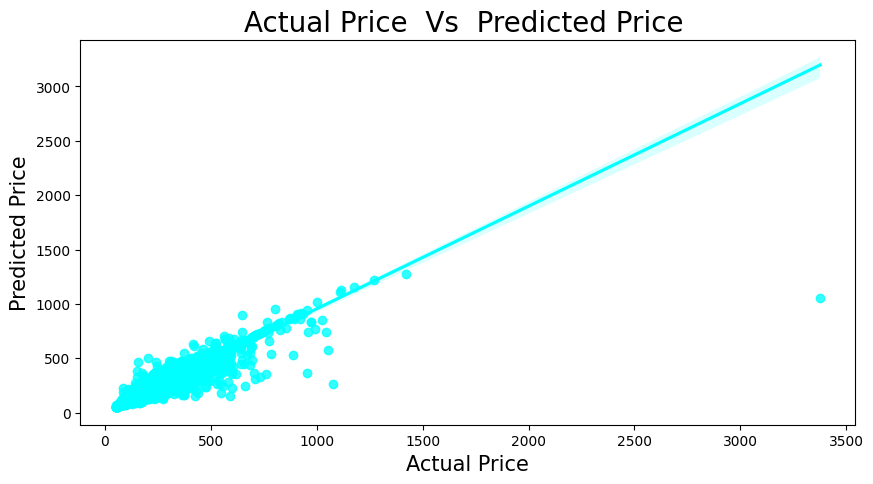

In [182]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()